In [154]:
#Importing Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set() #Setting seaborn for graphics

In [155]:
#Read csv file
df=pd.read_csv('data/human_body_temperature.csv')

In [156]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [157]:
df.tail()

,temperature,gender,heart_rate
125,96.3,M,70.0
126,97.7,M,77.0
127,98.2,F,73.0
128,97.9,M,72.0
129,98.7,F,59.0


In [158]:
#Question 1

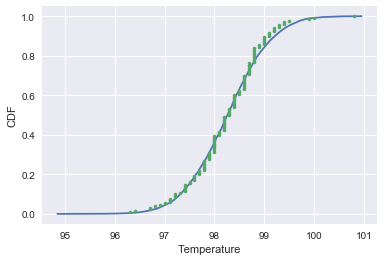

In [159]:
#checking for normality graphically
#Calculating meand and std
mean=np.mean(df.temperature)
std=np.std(df.temperature)
samples=np.random.normal(mean, std, size=10000)

#Defining CDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

#Calculating ECDF
x, y=ecdf(df.temperature)
x_s, y_s=ecdf(samples)

#Plotting Sample and Data ECDF
_=plt.plot(x_s, y_s)
_=plt.plot(x, y, marker='.', linestyle='none')
_=plt.xlabel('Temperature')
_=plt.ylabel('CDF')
plt.show()

In [160]:
#Testing null hypothesis that distribution is a normal distribution using scipy
import scipy.stats as stats
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

In [161]:
#Question 2

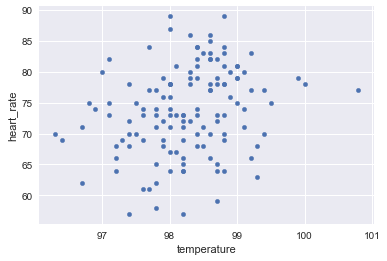

In [162]:
df.plot(x='temperature', y='heart_rate', kind='scatter')

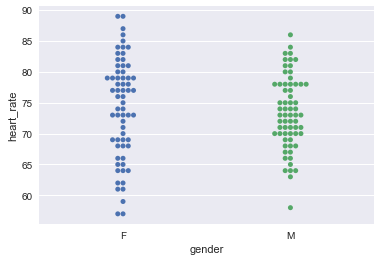

In [163]:
sns.swarmplot(x='gender', y='heart_rate', data=df)

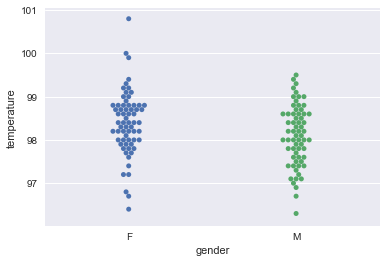

In [164]:
sns.swarmplot(x='gender', y='temperature', data=df)

In [165]:
#Question3

In [166]:
#Defining fucntion to draw BS replicates

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
        # Generate replicates
    for i in range(size):
            bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
            return bs_replicates

In [167]:
#Bootstrap Hypothesis Testing

# Make an array of translated temperature mean
translated_mean_temp = df.temperature - np.mean(df.temperature) + 98.6

# Take bootstrap replicates 
bs_replicates = draw_bs_reps(translated_mean_temp, np.mean, 50)

# Compute fraction of replicates that are less than the observed mean temperature
p = np.sum(bs_replicates <= np.mean(df['temperature'])) / 50

# Print the p-value
print('p = ', p)

p =  0.0


In [168]:
#Frequentist Statistical Testing
sample=np.random.choice(df.temperature, size=50) #extracting sample
#One sample t-test
stats.ttest_1samp(sample, 98.6)


Ttest_1sampResult(statistic=-3.6250115607030153, pvalue=0.0006864278050370211)

In [169]:
#Z score statistical testing
sample_mean=np.mean(sample)
std=np.std(sample)
sqrt=np.sqrt(50)
z=(sample_mean -98.6)/(std/sqrt)
print('z score is =', z)
p=(1-0.003)*(std)
print ('p =', p)

z score is = -3.661814652075332
p = 0.7161875090672837


In [170]:
#Question4

In [171]:
#Re-doing t test 
sample_n=np.random.choice(df.temperature, size=10) #extracting sample
#one sample t-test
stats.ttest_1samp(sample_n, 98.6)

Ttest_1sampResult(statistic=-0.2146144575844496, pvalue=0.8348518607448766)

In [172]:
#Re-doing Z score test
#Z score statistical testing
sample_mean=np.mean(sample_n)
std=np.std(sample_n)
sqrt=np.sqrt(10)
z=(sample_mean -98.6)/(std/sqrt)
print('z score is =', z)
p=(1-0.485)*(std)
print ('p =', p)

z score is = -0.2262235015894864
p = 0.35994779135313476


In [173]:
#Question5

In [199]:
#Calculating margin of error and confidence intervals 

#Bootstrap Replicates Confidence Interval (translated mean)
conf_int=np.percentile(bs_replicates, [2.5, 97.5])
print(conf_int)

[117.90399777 156.50135049]


In [175]:
#T-test confidence interval
stats.norm.interval(0.95, loc=np.mean(sample), scale=np.std(sample))

(96.8200744995493, 99.63592550045068)

In [177]:
#Margin of Error for BS
stats.sem(bs_replicates)

1.9771898940537918

In [178]:
#Margin of Error for T-test
stats.sem(sample)

0.10262036238247367

In [ ]:
#Question6

In [190]:
#Grouping dataset to get mean temperature of each gender
df.groupby('gender', as_index=False).temperature.mean()

,gender,temperature
0,F,98.393846
1,M,98.104615


In [191]:
#Grouping dataset to get variance temperature of each gender
df.groupby('gender', as_index=False).temperature.var()

,gender,temperature
0,F,0.552774
1,M,0.488260


In [193]:
#Assigning values to male and female temperature
male_tem=98.104615
female_tem=98.393846
male_var=0.488260
female_var=0.552774


In [197]:
#Importing Module
from scipy.stats import ttest_ind, ttest_ind_from_stats
#Computing t-test of 2 sample means, with null hyp assuming they are equal
t1, p1 = ttest_ind_from_stats(male_tem, np.sqrt(male_var), 50,
                              female_tem, np.sqrt(female_var), 50,
                              equal_var=False)
print(t1, p1)

-2.004459955350336 0.04779059076603717


In [ ]:
#End of Assignment